# Genética de poblaciones básica

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pylab
import numpy as np
import seaborn as sns
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import itertools
import subprocess
import pandas as pd
from scipy.interpolate import interp1d
from scipy.optimize import minimize
from scipy.integrate import simps

(array([47., 50., 40., 50., 52., 61., 48., 53., 54., 58., 40., 57., 53.,
        44., 44., 39., 46., 44., 61., 59.]),
 array([150., 155., 160., 165., 170., 175., 180., 185., 190., 195., 200.,
        205., 210., 215., 220., 225., 230., 235., 240., 245., 250.]),
 <BarContainer object of 20 artists>)

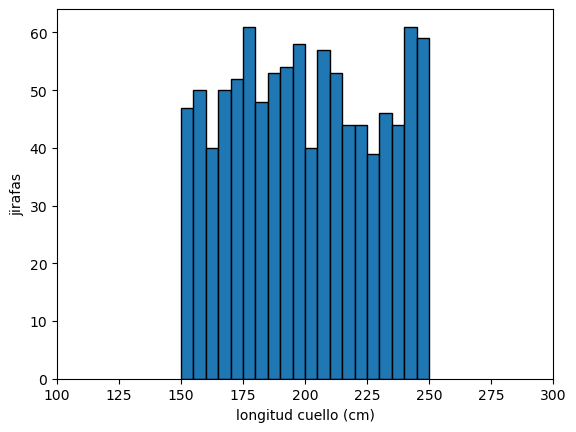

In [18]:
rng=np.random.default_rng()
J=rng.integers(150,251,1000)
fig=plt.figure()
ax=plt.gca()
H=plt.hist(J,bins=20, edgecolor='k')
ax.set_xlabel('longitud cuello (cm)')
ax.set_ylabel('jirafas')
ax.set_xlim([100,300])
H

0.9999999999999999


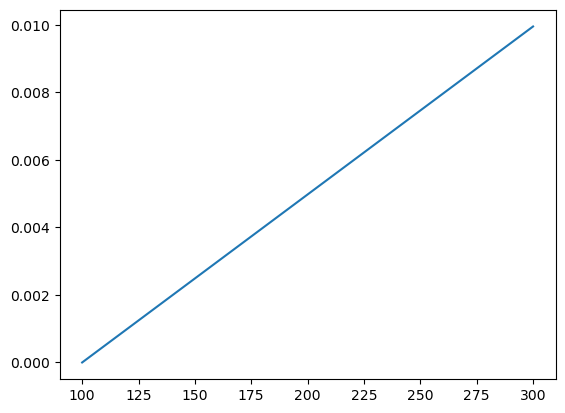

In [4]:
def prob(x):
    a=10
    A=np.array([a*(z-100) for z in range(100,301)])
    As=np.sum(A)
    return a*(x-100)/As

L=np.array(range(100,301))
P=prob(L)
print(np.sum(P))
fig=plt.figure()
ax=plt.gca()
ax.plot(L,P)


(100.0, 300.0)

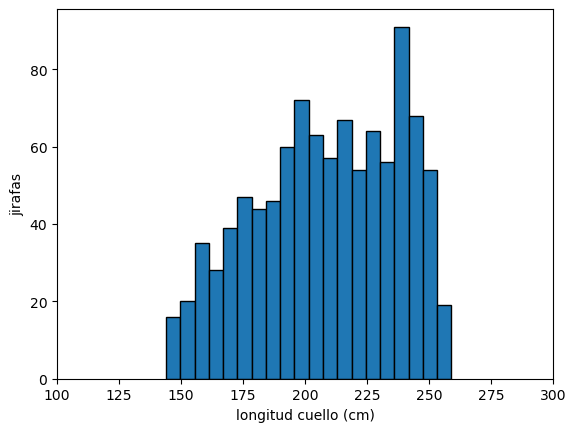

In [19]:
def sel(x):
    a=10
    return 1+np.heaviside(x-100,0)*(-1+a*(x-100))

rng=np.random.default_rng()
Pop=1000
Prob=sel(J)
Off=rng.choice(J, size=(Pop), p=Prob/np.sum(Prob))
Off+=rng.integers(-10,10,Pop)
fig=plt.figure()
ax=plt.gca()
H=plt.hist(Off,bins=20, edgecolor='k')
ax.set_xlabel('longitud cuello (cm)')
ax.set_ylabel('jirafas')
ax.set_xlim([100,300])

(100.0, 300.0)

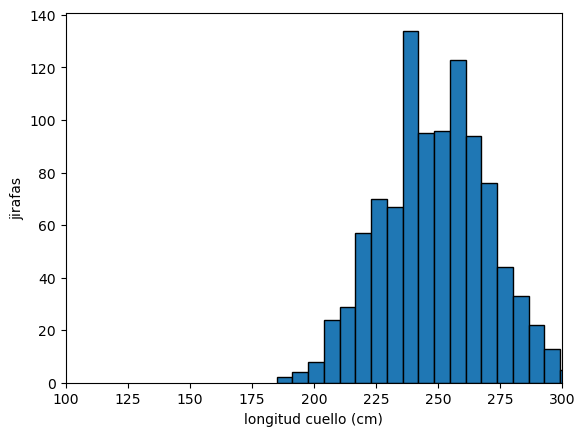

In [20]:
# DIEZ GENERACIONES

NOff=np.array(Off)
for n in range(10):
    Prob=sel(NOff)
    Off2=rng.choice(NOff, size=(Pop), p=Prob/np.sum(Prob))
    Off2+=rng.integers(-10,10,Pop)
    NOff=np.array(Off2)
fig=plt.figure()
ax=plt.gca()
H=plt.hist(NOff,bins=20, edgecolor='k')
ax.set_xlabel('longitud cuello (cm)')
ax.set_ylabel('jirafas')
ax.set_xlim([100,300])

# FISHER MODELO INFINITESIMAL

(100.0, 300.0)

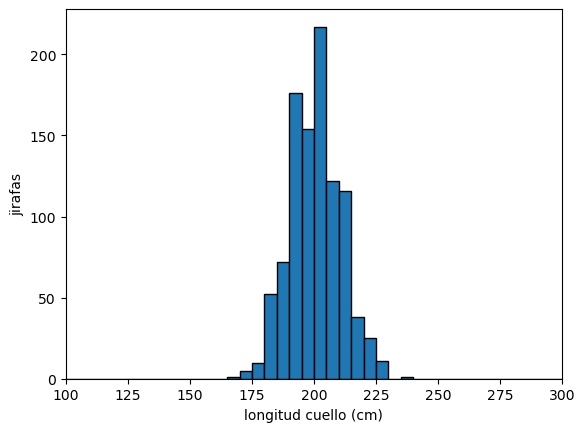

In [49]:
def cuello(G):
    return 1*len(G)+2*np.sum(G)

Pop=1000
J=np.array([rng.choice([0, 1], size=(100,), p=[0.5, 0.5]) for _ in range(Pop)])
Phen=np.array([cuello(z) for z in J])
fig=plt.figure()
ax=plt.gca()
bins=np.arange(100,301,5)
H=plt.hist(Phen,bins=bins, edgecolor='k')
ax.set_xlabel('longitud cuello (cm)')
ax.set_ylabel('jirafas')
ax.set_xlim([100,300])

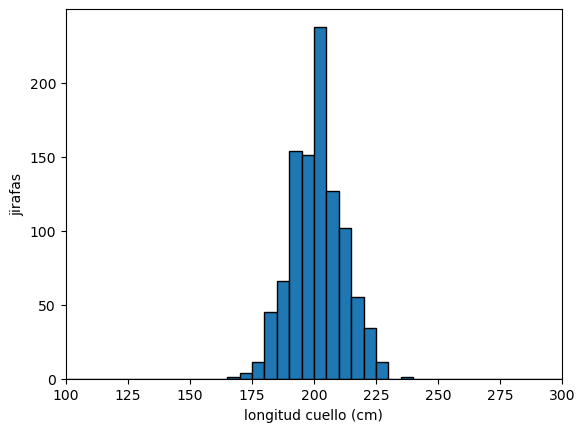

In [50]:
def mut(X):
    mu=0.01
    M=rng.uniform(0,1)
    if M<mu:
        pos=rng.integers(0,len(X))
        Y=int(not X[pos])
        X[pos]=Y
    return X

Prob=sel(Phen)
Off=rng.choice(len(J), size=(Pop,), p=Prob/np.sum(Prob))
Offmut=[mut(J[z]) for z in Off]
NewJ=np.array(Offmut)
NewPhen=np.array([cuello(z) for z in NewJ])
fig=plt.figure()
ax=plt.gca()
H=plt.hist(NewPhen,bins=bins, edgecolor='k')
ax.set_xlabel('longitud cuello (cm)')
ax.set_ylabel('jirafas')
ax.set_xlim([100,300]);

(100.0, 300.0)

<Figure size 640x480 with 0 Axes>

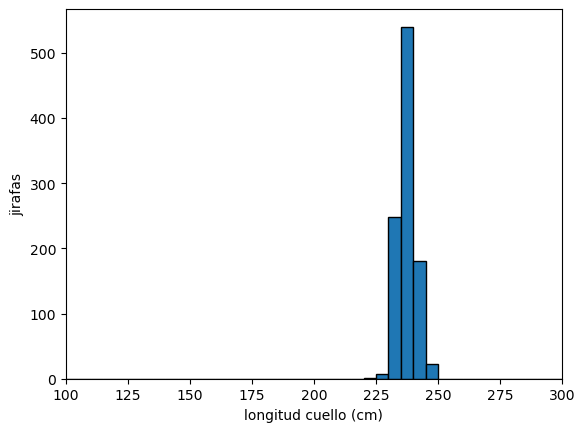

In [51]:
T=100
fig=plt.figure()
for n in range(T):
    Prob=sel(NewPhen)
    NewOff=rng.choice(len(J), size=(Pop,), p=Prob/np.sum(Prob))
    Offmut=[mut(NewJ[z]) for z in NewOff]
    NewJ=np.array(Offmut)
    NewPhen=np.array([cuello(z) for z in NewJ])
fig=plt.figure()
ax=plt.gca()
H=plt.hist(NewPhen,bins=bins, edgecolor='k')
ax.set_xlabel('longitud cuello (cm)')
ax.set_ylabel('jirafas')
ax.set_xlim([100,300])

<Figure size 640x480 with 0 Axes>

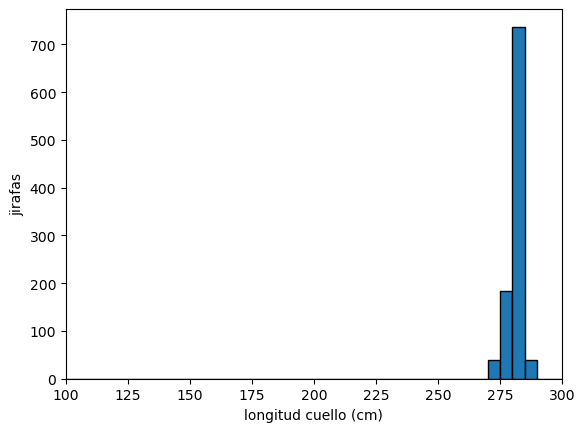

In [53]:
T=1000
fig=plt.figure()
for n in range(T):
    Prob=sel(NewPhen)
    NewOff=rng.choice(len(J), size=(Pop,), p=Prob/np.sum(Prob))
    Offmut=[mut(NewJ[z]) for z in NewOff]
    NewJ=np.array(Offmut)
    NewPhen=np.array([cuello(z) for z in NewJ])
fig=plt.figure()
ax=plt.gca()
H=plt.hist(NewPhen,bins=bins, edgecolor='k')
ax.set_xlabel('longitud cuello (cm)')
ax.set_ylabel('jirafas')
ax.set_xlim([100,300]);

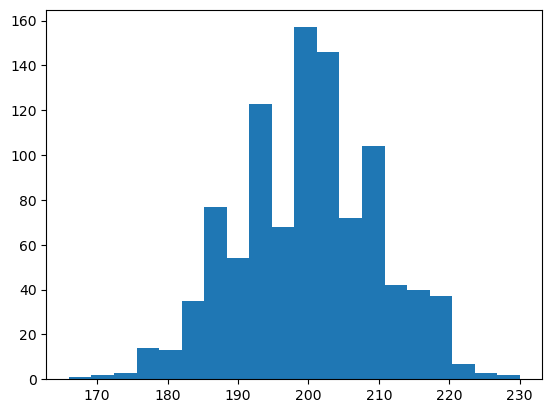

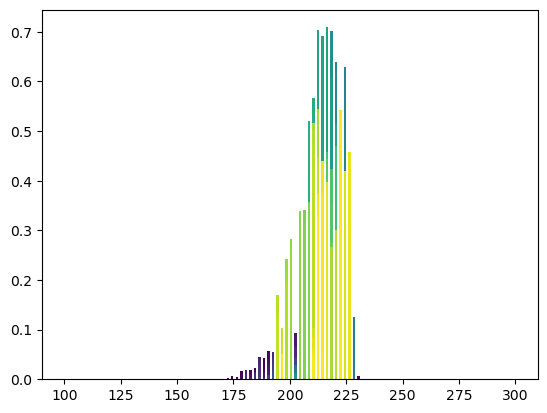

In [57]:
from scipy.stats import norm
def sel(pico):
    X=np.arange(Pop)
    Prob=norm.pdf(X, loc=pico, scale=10)
    return Prob

def mut(X):
    mu=0.001
    M=np.random.uniform(0,1)
    if M<mu:
        pos=np.random.randint(0,len(X))
        if X[pos]==0:
            X[pos]=1
        else:
            X[pos]=0
    return X

Pop=1000
J=[np.random.choice([0, 1], size=(100,), p=[0.5, 0.5]) for _ in range(Pop)]
Phen=[cuello(z) for z in J]

fig=plt.figure()
H=plt.hist(Phen,bins=20)
cmap=matplotlib.colormaps['viridis']
T=200
fig=plt.figure()
bins=np.arange(100,301)
for n in range(T):
    Off1=np.random.choice(len(J), size=(Pop,), p=np.array(Phen)/np.sum(Phen))
    Off2=[mut(J[z]) for z in Off1]
    Phen2=[cuello(z) for z in Off2]
    H=plt.hist(Phen2,bins=bins, color=cmap(n/T), density=True)
    J=list(Off2)
    Phen=list(Phen2)